<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/7_optimal_currency_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7　効率的フロンティアを用いた最適通貨構成

7.1　2通貨の効率的フロンティアと最適資産構成

　本例では、現代ポートフォリオ理論を外国為替リスク管理に応用します。学習用として、2通貨の為替レートデータから、そのリスク（標準偏差）と期待リターンを算出することにより、効率的フロンティアを導出します。

In [1]:
#[1]ライブラリ読み込み
from pandas_datareader import data
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

7.2　データの取得

　ライブラリの読み込み後、為替レートの日次データを、pandas_datareaderを用いて米セントルイス連邦銀行から取得します。本例では2010年1月1日から2023年12月31日までの、日本円対USドルレート（DEXJPUS）とUSドル対ユーロレート（DEXUSEU）の為替レートデータをデータフレーム（USDJPY）に格納します。この2つの為替レートデータを用いて、最終行において、日本円対ユーロレートを算出します。

　本例は、日本円、ユーロの対USドルレートを用いた事例です。英ポンド、中国人民元、香港ドル、インドルピー等、他の通貨を分析する場合は、ティッカーコードはhttps://fred.stlouisfed.org/categories/94
で確認してください。

In [22]:
#[2]為替レート日次データの取得
tickers=['DEXJPUS','DEXUSEU']#複数(2種類)の為替レートを米セントルイス連銀から同時取得
start=datetime.date(2000,1,1)#標本期間を2019年1月1日から
end=datetime.date(2023,12,20)#2022年12月31日までに指定
USDJPY=data.DataReader(tickers,'fred',start=start,end=end)#データの取得
USDJPY['EURJPY']=USDJPY['DEXJPUS']*USDJPY['DEXUSEU']#日本円の対ユーロレートの算出

　次に取得、算出した為替日次データから、前日比（為替リターン）を計算します。データフレームUSDJPYの各変数の前日比を「データフレーム名.pct_change()」により算出します。前日比を算出すると、必ず、データの先頭行に欠損値が生じますので、これを「データフレーム名.dropna()」により除去します。

　続いて変数名を再定義します。currency_listという新たな「リスト名」を生成して3種類の為替レートの変数名を定義します。そして3行目では、データフレームdfの変数名（columns）がこのリスト名であることを指示します。

　最終行では、.head()により前処理されたデータを再確認します。

In [ ]:
#[3]データ前処理
df=USDJPY.pct_change().dropna() #データフレームUSDJPYを前期比(前日比)に変換し、欠損値を除去
currency_list=['JPYUSD','USDEUR','JPYEUR']
df.columns=currency_list
df.head()

7.3　為替リターンとボラティリティの算出

　この2種類の時系列データから、為替レートの平均リターン（Rp）を算出します。続いて平均リターン（Rp）と同様に、分散（VAR_Rp）、共分散（Cov_Rp）を算出します。平均リターン（Rp）、分散（VAR_Rp）、共分散（Cov_Rp）は、いずれも年率換算するため×250営業日を施します。

In [8]:
#[4]ポートフォリオ収益率の平均・分散・共分散の算出
Rp=df.mean()*250 #年率データへ換算
VAR_Rp=df.var()*250
Cov_Rp=df['JPYUSD'].cov(df['JPYEUR'])*250

7.4　通貨構成比率別のリターンとボラティリティ

　算出された平均リターン（Rp）、分散（VAR_Rp）、共分散（Cov_Rp）を用いて通貨構成比率別のポートフォリオ全体のリターンとリスク（標準偏差）を算出します。ここではnumpyのnp.(arrange)を用いることで、1％ずつUSドル（ユーロ）の保有比率を引き上げ（低下させ）、それぞれの資産配分比率時のリターンとリスク（標準偏差）を算出します。可視化する際の横軸はリスク（標準偏差）を用いるため、ポートフォリオ全体の分散Var Rp2はnp.sqrt(Var Rp2)により標準偏差へ再計算します。

In [23]:
#[5]通貨比率別平均リターンの算出
weights=np.arange(0,1.01,0.01) #比率0%から1%刻みで100%まで増加
for i in np.arange(0,1.01,0.01):
  E_Rp=weights*Rp["JPYUSD"]+(1-weights)*Rp["JPYEUR"] #各比率ごとに平均リターンの反復計算

In [24]:
#[6]通貨比率別標準偏差の算出
for i in np.arange(0,1.01,0.01):
  Var_Rp2=weights*weights*VAR_Rp["JPYUSD"]+(1-weights)*(1-weights)*VAR_Rp["JPYEUR"]+2*weights*(1-weights)*Cov_Rp #各比率ごとに標準偏差の反復計算
Sigma_Rp=np.sqrt(Var_Rp2)

7.5　効率的フロンティアの導出

　日本円の対USドルレート、対ユーロレートの平均リターン、ボラティリティの算出結果を用い、効率的フロンティアを導出します。解釈の仕方は、株式の場合の「現代ポートフォリオ理論」と同様です。

Text(0, 0.5, 'Expected Return')

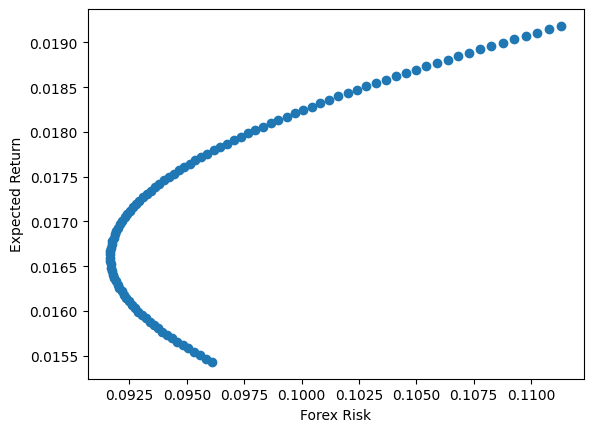

In [12]:
#[7]可視化
plt.scatter(Sigma_Rp,E_Rp)#散布図の作成
plt.xlabel("Forex Risk") #横軸ラベルの指定
plt.ylabel("Expected Return") #縦軸ラベルの指定

7.6　資本市場線（CML）とシャープレシオの導出・算出

　次に、資本市場線（Capital Market Line: CML）を導出します。ここでは、全ての資産を日本国債で保有した場合の利回りを1％とします。まず、平均リターンと標準偏差の算出に際し、numpyを用いて算出した各資産ご比率ごとのリターンとリスクの値を、新しいpandasデータフレームdf1に格納します。そして、これらのデータを用いてシャープレシオを算出します（s_ratio）。np.amax()を用いて、このデータから最も高いシャープレシオの抽出が可能となります（max_sr）。

In [ ]:
#[8]シャープレシオの算出
rf=0.01 #無リスク資産の利回り
columns=['Ratio']
mean_variance=pd.DataFrame(data=weights, columns=columns) #pandasデータ配列へ変換
mean_variance['Risk'] = pd.DataFrame(Sigma_Rp)
mean_variance['Expected_Returns'] = pd.DataFrame(E_Rp)
mean_variance['Sharp_Ratio'] = pd.DataFrame((E_Rp-rf)/Sigma_Rp)
s_ratio=(E_Rp-rf)/Sigma_Rp #シャープレシオの定義
max_sr=np.amax(s_ratio) #シャープレシオ最大値の変数定義
mean_variance

7.7　最適通貨構成比率の算出

　続いて、すでに作成したmean_varianceのデータフレームを用いて、loc[mean_variance['Sharp_Ratio'].idxmax()]により、シャープレシオが最大となるUSドルとユーロの通貨構成比率、標準偏差、リターンを保存します。そして、この時の標準偏差（optimal.iloc[1,0]）、平均リターン（optimal.iloc[2,0]）の値を抽出して、それぞれを新しい変数名opt_risk、opt_returnと名付けます。

In [ ]:
#[9]最適資産比率の導出
optimal=pd.DataFrame(mean_variance.loc[mean_variance['Sharp_Ratio'].idxmax()]) #シャープレシオ最大時の比率・リスク・リターン
opt_risk=optimal.iloc[1,0] #最適資産構成時のリスク
opt_return=optimal.iloc[2,0] #最適資産構成時の期待リターン
optimal

7.8　可視化

　最後に横軸にリスク（標準偏差）、縦軸に期待リターンを採る資本市場線（CML）を効率的フロンティアとともに可視化します。資本市場線（CML）の傾きは、シャープレシオに一致します。線形の資本市場線(CML)の傾きは一定ですが、重要な点は、この資本市場線(CML)が必ず効率的フロンティアと接することになり、この接点が日本の居住者から見た、USドルとユーロの2通貨の最適通貨構成となることです。

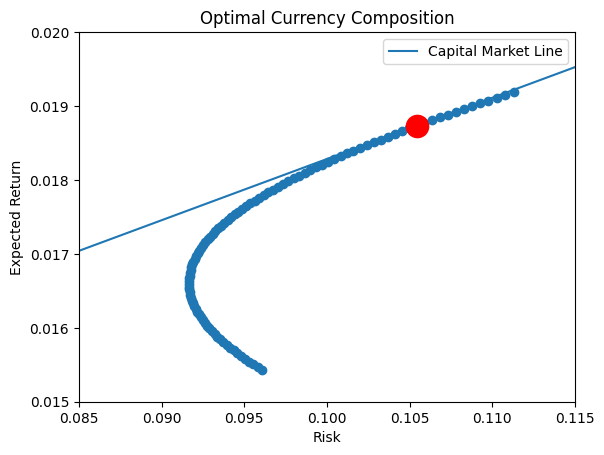

In [27]:
#[10]資本市場線（Capital Market Line: CML）の導出
def CML(rf,sharp_R,label):#無リスク資産・シャープレシオsharp_Rの関数定義
    Risk = [x/100 for x in range(100)] #横軸Riskを設定
    ExpectedReturn = [rf+max_sr*x for x in Risk] #縦軸Epを算出
    plt.plot(Risk,ExpectedReturn,label=label)
    plt.xlabel("Risk")
    plt.xlim(0.085,0.115) #横軸の幅設定
    plt.ylabel("Expected Return")
    plt.ylim(0.015,0.020) #縦軸の幅設定
    plt.title("Optimal Currency Composition")
    plt.plot(opt_risk,sharp_R,"ro",linestyle = "--",markersize=16) #資本市場線の作成

CML(rf,opt_return,"Capital Market Line") #CML導出
plt.scatter(Sigma_Rp,E_Rp)#効率的フロンティアの作成
plt.legend()
plt.show()